In [97]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo

import os
import os.path as path
import wget

In [98]:
if not path.exists('Data'):
    os.mkdir('Data')

!rm Data/Minimos.dat

file = 'Data/Minimos.dat'


#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..............................................................] 521 / 521File loaded


In [99]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]
N = len(x)

sigma = np.random.normal(loc=0,scale=10,size=N)
sigma = np.abs(sigma)

<ErrorbarContainer object of 3 artists>

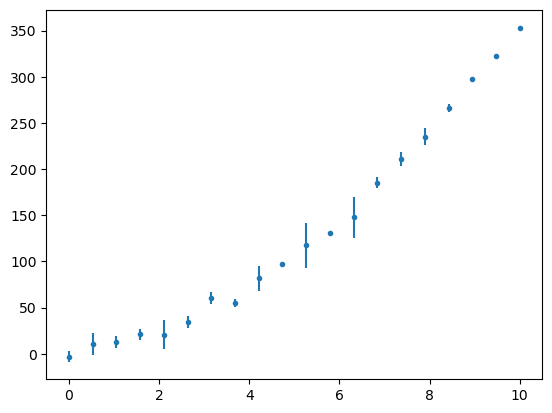

In [100]:
plt.errorbar(x, y, yerr=sigma, fmt='.')

In [123]:
# Modelo[
def GetModel(x, p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
    return y

# Chi2 
def Chi2(p, x, y, sigma):
    return np.sum( (y-GetModel(x,p))**2/2*sigma**2 )

In [124]:
p0 = np.ones(3)

In [125]:
nll = lambda *p: Chi2(*p)

In [126]:
result = spo.minimize(nll, p0, args = (x,y,sigma), options = {'disp':True})

Divide-by-zero encountered: rhok assumed large
         Current function value: 35106.464634
         Iterations: 10
         Function evaluations: 324
         Gradient evaluations: 78


In [127]:
bestparam = result.x

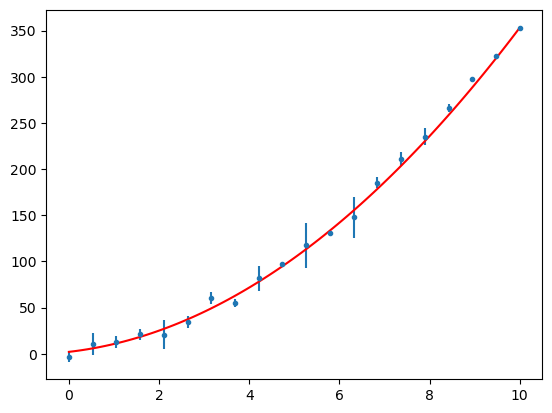

In [128]:
_x = np.linspace(np.min(x), np.max(x), 100)
_y = GetModel(_x, bestparam)
plt.errorbar(x, y, yerr=sigma, fmt='.')
plt.plot(_x, _y, color = 'r')

In [129]:
# Modelo[
def GetModel(x, p):
    y = 0
    #for n in range(len(p)):
        #y += p[n] * np.exp(x)
    return p[0]*np.exp(x*p[1])

In [131]:
# Chi2 
def Chi2(p, x, y, sigma):
    return np.sum( (y-GetModel(x,p))**2/(2*sigma**2) )

In [132]:
p0 = np.ones(4)
nll = lambda *p: Chi2(*p)
result = spo.minimize(nll, p0, args = (x,y,sigma), options = {'disp':True})

         Current function value: 365.724168
         Iterations: 163
         Function evaluations: 1241
         Gradient evaluations: 246


In [133]:
bestparam = result.x
result.fun/(N-len(p0))

22.85776050058067

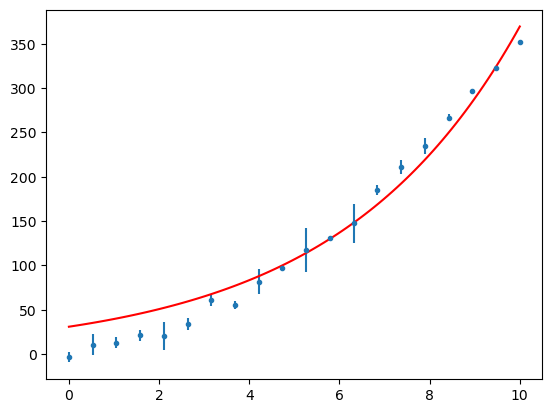

In [134]:
_x = np.linspace(np.min(x), np.max(x), 100)
_y = GetModel(_x, bestparam)
plt.errorbar(x, y, yerr=sigma, fmt='.')
plt.plot(_x, _y, color = 'r')

         Current function value: 30.198841
         Iterations: 12
         Function evaluations: 247
         Gradient evaluations: 47
1.8874275569336922


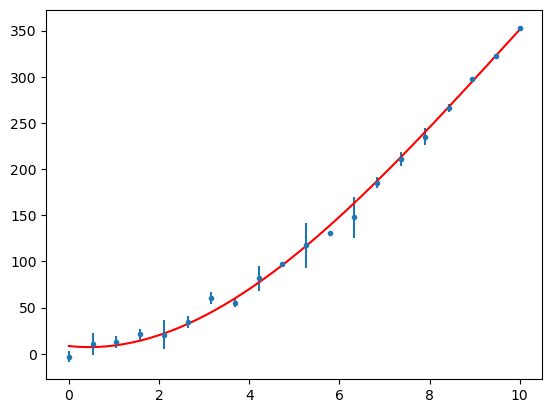

In [136]:
# Modelo[
def GetModel(x, p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
    return y

# Chi2 
def Chi2(p, x, y, sigma):
    return np.sum( (y-GetModel(x,p))**2/(2*sigma**2) )

p0 = np.ones(4)
nll = lambda *p: Chi2(*p)
result = spo.minimize(nll, p0, args = (x,y,sigma), options = {'disp':True})

bestparam = result.x
print(result.fun/(N-len(p0)))

_x = np.linspace(np.min(x), np.max(x), 100)
_y = GetModel(_x, bestparam)
plt.errorbar(x, y, yerr=sigma, fmt='.')
plt.plot(_x, _y, color = 'r')